In [1]:
# Bloco 1: Instalação e Importação de Bibliotecas
!pip install numpy matplotlib scikit-learn --quiet

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn import tree

print("Bibliotecas instaladas e importadas com sucesso!")

Bibliotecas instaladas e importadas com sucesso!


In [2]:
# Bloco 2: Preparação dos Dados
dados = [
    ['sol',    'alta',    'alta',    'não',   'não joga'],
    ['sol',    'alta',    'alta',    'sim',   'não joga'],
    ['nublado','alta',    'alta',    'não',   'joga'],
    ['chuva',  'alta',    'alta',    'não',   'joga'],
    ['chuva',  'baixa',   'normal',  'não',   'joga'],
    ['chuva',  'baixa',   'normal',  'sim',   'não joga'],
    ['nublado','baixa',   'normal',  'sim',   'joga'],
    ['sol',    'suave',   'alta',    'não',   'não joga'],
    ['sol',    'baixa',   'normal',  'não',   'joga'],
    ['chuva',  'suave',   'normal',  'não',   'joga'],
    ['sol',    'suave',   'normal',  'sim',   'joga'],
    ['nublado','suave',   'alta',    'sim',   'joga'],
    ['nublado','alta',    'normal',  'não',   'joga'],
    ['chuva',  'suave',   'alta',    'sim',   'não joga']
]

# Separando features (X) e target (Y)
X1 = np.array([linha[:4] for linha in dados])
Y = np.array([linha[4] for linha in dados])

print("Dados originais extraídos com sucesso!")
print("\nExemplo de features (X):", X1[0])
print("Exemplo de target (Y):", Y[0])

Dados originais extraídos com sucesso!

Exemplo de features (X): ['sol' 'alta' 'alta' 'não']
Exemplo de target (Y): não joga


In [3]:
# Bloco 3: Pré-processamento dos Dados
X = X1.copy()

# Mapeamento dos valores categóricos para numéricos
for i in range(len(X1)):
    # Céu
    if X1[i][0] == "sol":
        X[i][0] = 0
    elif X1[i][0] == "nublado":
        X[i][0] = 1
    else:  # chuva
        X[i][0] = 2

    # Temperatura
    if X1[i][1] == "alta":
        X[i][1] = 0
    elif X1[i][1] == "suave":
        X[i][1] = 1
    else:  # baixa
        X[i][1] = 2

    # Umidade
    if X1[i][2] == "alta":
        X[i][2] = 0
    else:  # normal
        X[i][2] = 1

    # Vento
    if X1[i][3] == "não":
        X[i][3] = 0
    else:  # sim
        X[i][3] = 1

# Criando DataFrames
XX = pd.DataFrame(X, dtype=str, columns=['Céu', 'Temperatura', 'Umidade', 'Vento'])
YY = pd.DataFrame(Y, dtype=str, columns=['Classe'])

print("\nDados convertidos para valores numéricos:")
print(XX.head())

print("\nClasses de saída:")
print(YY.head())


Dados convertidos para valores numéricos:
  Céu Temperatura Umidade Vento
0   0           0       0     0
1   0           0       0     1
2   1           0       0     0
3   2           0       0     0
4   2           2       1     0

Classes de saída:
     Classe
0  não joga
1  não joga
2      joga
3      joga
4      joga


In [4]:
# Bloco 4: Criação e Treinamento da Árvore de Decisão
arvore = DecisionTreeClassifier(criterion='entropy', random_state=42)
arvore = arvore.fit(XX, YY)

print("Árvore de decisão treinada com sucesso!")
print("\nImportância das features:", arvore.feature_importances_)
print("Classes:", arvore.classes_)
print("Acurácia no treino:", arvore.score(XX, YY))

Árvore de decisão treinada com sucesso!

Importância das features: [0.6385878  0.         0.16147801 0.1999342 ]
Classes: ['joga' 'não joga']
Acurácia no treino: 1.0


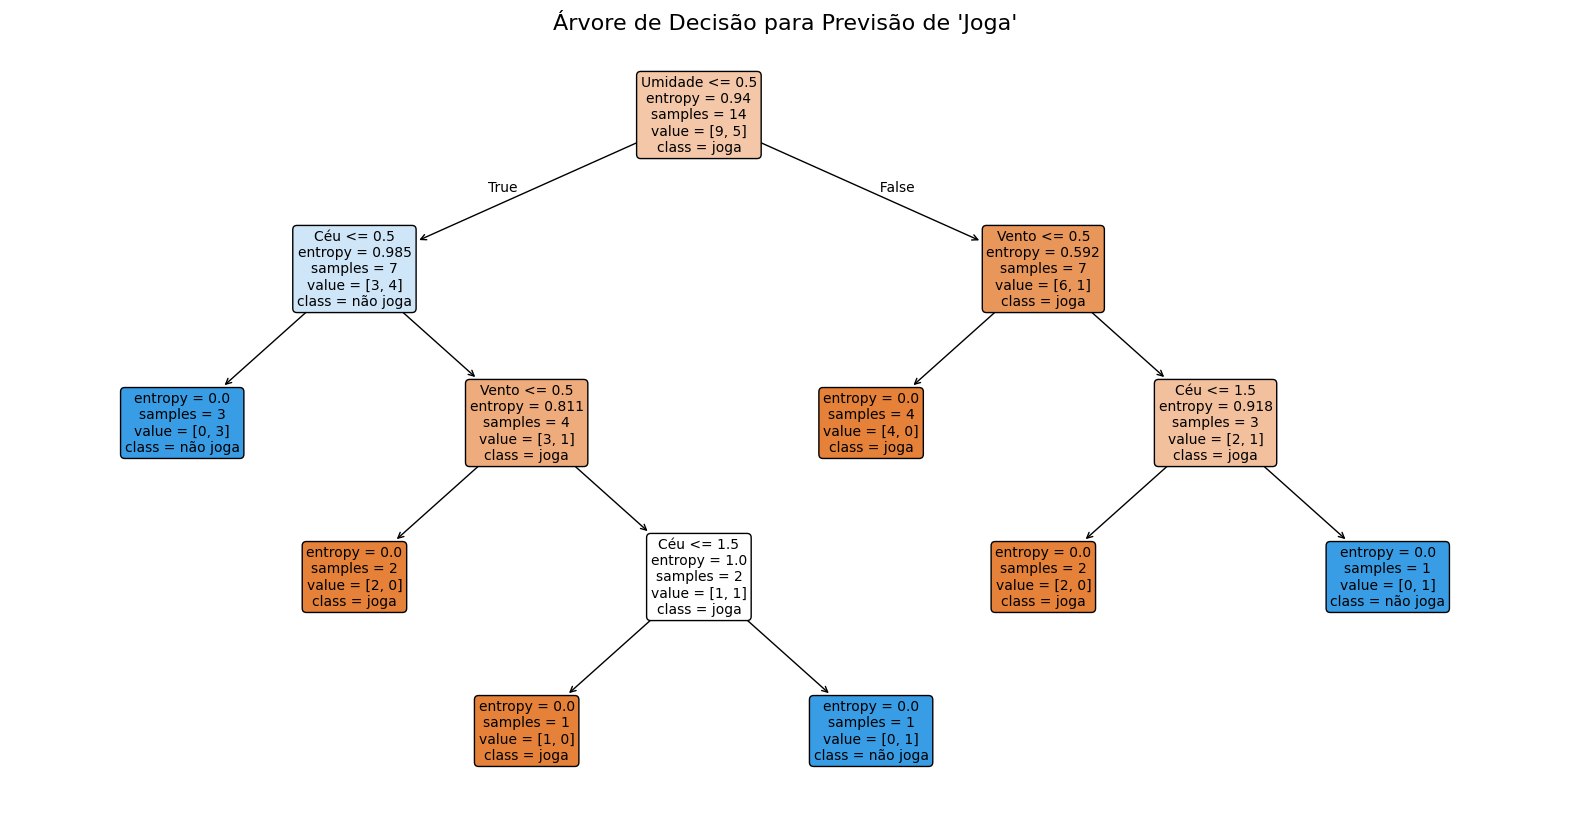

In [5]:
# Bloco 5: Visualização da Árvore de Decisão
plt.figure(figsize=(20,10))
previsores = ['Céu', 'Temperatura', 'Umidade', 'Vento']
tree.plot_tree(arvore,
               feature_names=previsores,
               class_names=arvore.classes_,
               filled=True,
               rounded=True,
               fontsize=10)
plt.title("Árvore de Decisão para Previsão de 'Joga'", fontsize=16)
plt.show()

In [6]:
# Bloco 6: Extração das Regras de Decisão
r = export_text(arvore, feature_names=previsores)
print("Regras da Árvore de Decisão:\n")
print(r)

Regras da Árvore de Decisão:

|--- Umidade <= 0.50
|   |--- Céu <= 0.50
|   |   |--- class: não joga
|   |--- Céu >  0.50
|   |   |--- Vento <= 0.50
|   |   |   |--- class: joga
|   |   |--- Vento >  0.50
|   |   |   |--- Céu <= 1.50
|   |   |   |   |--- class: joga
|   |   |   |--- Céu >  1.50
|   |   |   |   |--- class: não joga
|--- Umidade >  0.50
|   |--- Vento <= 0.50
|   |   |--- class: joga
|   |--- Vento >  0.50
|   |   |--- Céu <= 1.50
|   |   |   |--- class: joga
|   |   |--- Céu >  1.50
|   |   |   |--- class: não joga



In [7]:
# Bloco 7: Fazendo Previsões
print("Exemplos de previsão:")

# Exemplo 1: Céu=sol, Temp=alta, Umidade=alta, Vento=não
X2 = pd.DataFrame([['0','0','0','0']], columns=previsores)
print("\nCondições 1:\n", X2)
print("Previsão:", arvore.predict(X2)[0])

# Exemplo 2: Céu=nublado, Temp=suave, Umidade=normal, Vento=sim
X3 = pd.DataFrame([['1','1','1','1']], columns=previsores)
print("\nCondições 2:\n", X3)
print("Previsão:", arvore.predict(X3)[0])

# Exemplo 3: Céu=chuva, Temp=baixa, Umidade=normal, Vento=não
X4 = pd.DataFrame([['2','2','1','0']], columns=previsores)
print("\nCondições 3:\n", X4)
print("Previsão:", arvore.predict(X4)[0])

Exemplos de previsão:

Condições 1:
   Céu Temperatura Umidade Vento
0   0           0       0     0
Previsão: não joga

Condições 2:
   Céu Temperatura Umidade Vento
0   1           1       1     1
Previsão: joga

Condições 3:
   Céu Temperatura Umidade Vento
0   2           2       1     0
Previsão: joga


In [9]:
# Bloco 8: Interpretação dos Valores Numéricos (Opcional)
print("\nLegenda para interpretação dos valores:")
print("\nCéu:")
print("0 = sol, 1 = nublado, 2 = chuva")
print("\nTemperatura:")
print("0 = alta, 1 = suave, 2 = baixa")
print("\nUmidade:")
print("0 = alta, 1 = normal")
print("\nVento:")
print("0 = não, 1 = sim")


Legenda para interpretação dos valores:

Céu:
0 = sol, 1 = nublado, 2 = chuva

Temperatura:
0 = alta, 1 = suave, 2 = baixa

Umidade:
0 = alta, 1 = normal

Vento:
0 = não, 1 = sim
